
### Dataset Description
The dataset used is the [Heart Disease UCI dataset](https://archive.ics.uci.edu/ml/datasets/heart+Disease), which contains medical attributes such as age, cholesterol levels, blood pressure, and more.



In [4]:
import platform
print(platform.architecture())

('64bit', 'WindowsPE')


In [5]:
import sys
print(sys.executable)
print(sys.version)


C:\Users\A Ebrahim\AppData\Local\Programs\Python\Python312\python.exe
3.12.10 (tags/v3.12.10:0cc8128, Apr  8 2025, 12:21:36) [MSC v.1943 64 bit (AMD64)]


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model


## Load the dataset

In [7]:
# Load the dataset
url = "C:/Users/A Ebrahim/Desktop/COLLEGE MATERIAL/SEM -2/ML/HeartAssignment/heart.csv"
df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory Data Analysis

In [8]:
# Check data information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Check for missing values
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

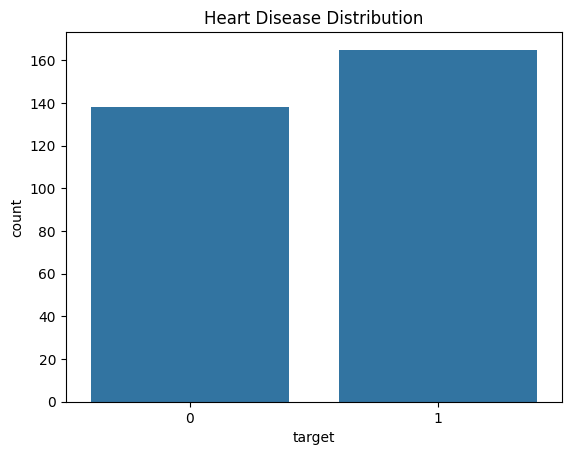

In [10]:
# Visualize class distribution
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.show()


### Performed various visualization to understand the nature of data

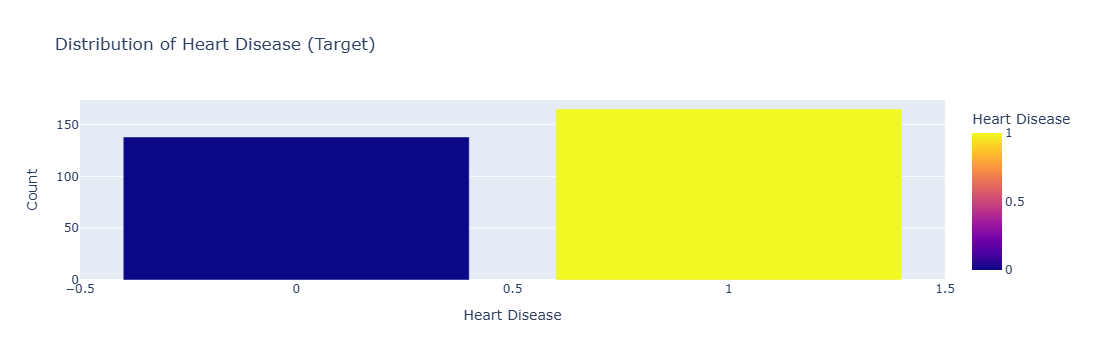

In [13]:
import plotly.express as px
target_counts = df['target'].value_counts().reset_index()
target_counts.columns = ['target', 'count']  # Rename columns

# Step 2: Create Plotly bar chart
fig = px.bar(
    target_counts,
    x='target',
    y='count',
    color='target',
    labels={'target': 'Heart Disease', 'count': 'Count'},
    color_discrete_map={0: 'blue', 1: 'yellow'},
    title='Distribution of Heart Disease (Target)'
)
fig.show()

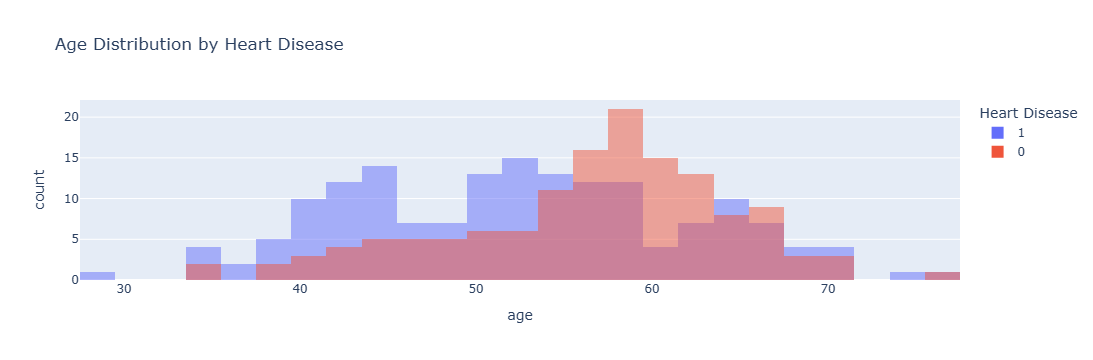

In [14]:
fig = px.histogram(df, x="age", color="target",
                   barmode="overlay",
                   labels={"target": "Heart Disease"},
                   title="Age Distribution by Heart Disease")
fig.show()


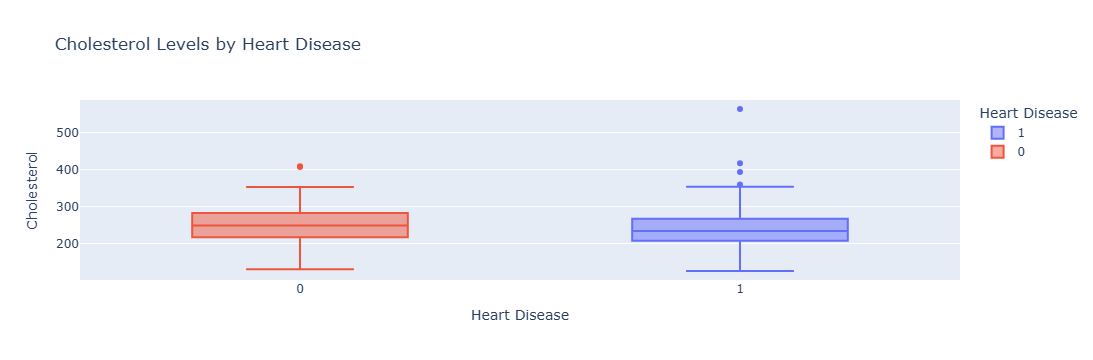

In [17]:
fig = px.box(df, x="target", y="chol",
             color="target",
             labels={"target": "Heart Disease", "chol": "Cholesterol"},
             title="Cholesterol Levels by Heart Disease")
fig.show()


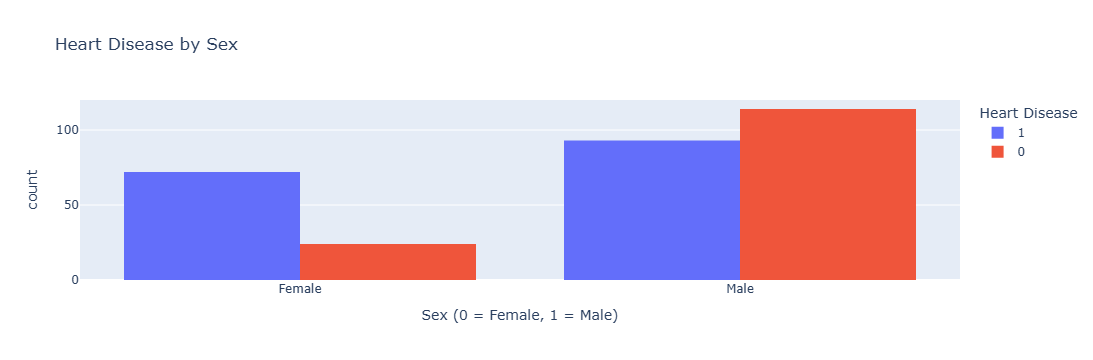

In [18]:
fig = px.histogram(df, x='sex', color='target',
                   barmode='group',
                   labels={'sex': 'Sex (0 = Female, 1 = Male)', 'target': 'Heart Disease'},
                   title="Heart Disease by Sex")
fig.update_xaxes(tickvals=[0, 1], ticktext=['Female', 'Male'])
fig.show()


## Data Preprocessing

- Divide the data into Features and Target
- Perform Feature Scaling
- Divide the data into Training and Test Sets

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# 1. Divide the data into Features (X) and Target (Y)
X = df.drop('target', axis=1)  
Y = df['target']               

# 2. Perform Feature Scaling
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)  # Apply scaling

# 3. Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size=0.3, random_state=0)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (212, 13)
X_test shape: (91, 13)
Y_train shape: (212,)
Y_test shape: (91,)


## Logistic Regression Model

- Initialize a Logistic Regression Model
- Train the model
- Find the Training Accuracy, Precision, Recall, F1 Score
- Find the Test Accuracy, Precision, Recall, F1 Score
- Visualize Train and Test Confusion Metrics
- Visualize the Training and Test Performance Metrics
- Add more cells as required.

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)

print("Intercept:", logistic_model.intercept_)
print("Coefficients:", logistic_model.coef_)

Intercept: [1.0779628]
Coefficients: [[ 0.12230703 -1.55196422  1.31473499 -0.22109964 -0.29178254 -0.47789256
   0.16858828  0.6817236  -0.85227789 -1.01349054  0.26822728 -0.79081153
  -0.73661881]]


In [57]:
Y_pred_train = logistic_model.predict(X_train)

train_accuracy = accuracy_score(Y_train, Y_pred_train)
train_recall = recall_score(Y_train, Y_pred_train)
train_precision = precision_score(Y_train, Y_pred_train)
train_f1 = f1_score(Y_train, Y_pred_train)

print("\nTraining Performance")
print(f"Accuracy: {train_accuracy:.3f}")
print(f"Recall: {train_recall:.3f}")
print(f"Precision: {train_precision:.3f}")
print(f"F1 Score: {train_f1:.3f}")


Training Performance
Accuracy: 0.849
Recall: 0.915
Precision: 0.831
F1 Score: 0.871


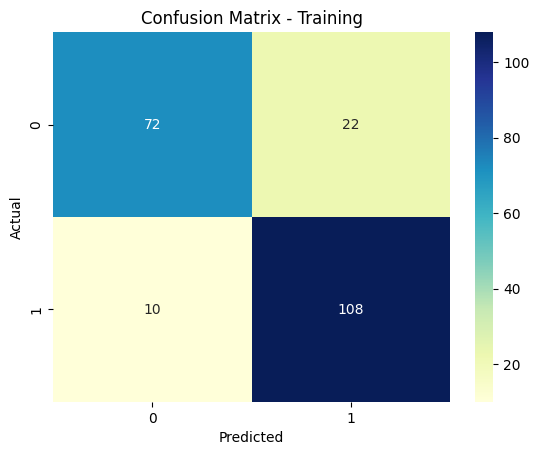

In [58]:
cm_train = confusion_matrix(Y_train, Y_pred_train)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Training")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [60]:
# Test performance
Y_pred_test = logistic_model.predict(X_test)

test_accuracy = accuracy_score(Y_test, Y_pred_test)
test_recall = recall_score(Y_test, Y_pred_test)
test_precision = precision_score(Y_test, Y_pred_test)
test_f1 = f1_score(Y_test, Y_pred_test)

print("\nTest Performance")
print(f"Accuracy: {test_accuracy:.3f}")
print(f"Recall: {test_recall:.3f}")
print(f"Precision: {test_precision:.3f}")
print(f"F1 Score: {test_f1:.3f}")


Test Performance
Accuracy: 0.813
Recall: 0.894
Precision: 0.778
F1 Score: 0.832


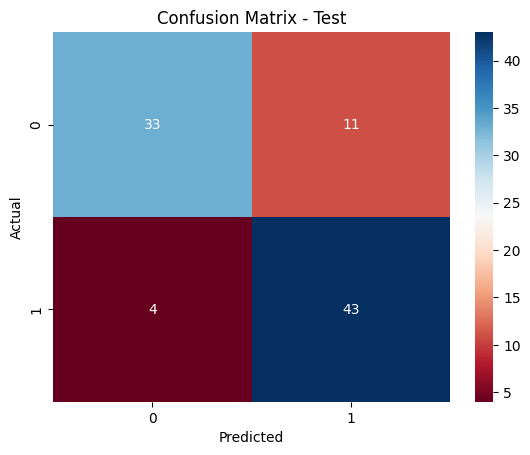

In [49]:
cm_test = confusion_matrix(Y_test, Y_pred_test)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="RdBu")
plt.title("Confusion Matrix - Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Neural Network Model

- Design a Neural Network Model
- Train the model
- Find the Training Accuracy, Precision, Recall, F1 Score
- Find the Test Accuracy, Precision, Recall, F1 Score
- Plot the train and test accuracy after each epoch (Hint: Use History)
- Visualize Train and Test Confusion Metrics
- Visualize the Training and Test Performance Metrics

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
nn_model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [66]:
history = nn_model.fit(X_train, Y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, Y_test), verbose=1)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.5849 - loss: 0.7969 - val_accuracy: 0.4945 - val_loss: 0.7814
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5405 - loss: 0.7526 - val_accuracy: 0.5055 - val_loss: 0.7440
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5445 - loss: 0.7200 - val_accuracy: 0.5055 - val_loss: 0.7148
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5582 - loss: 0.6976 - val_accuracy: 0.5385 - val_loss: 0.6886
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5456 - loss: 0.6707 - val_accuracy: 0.5495 - val_loss: 0.6648
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6103 - loss: 0.6633 - val_accuracy: 0.6264 - val_loss: 0.6447
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6866 - loss: 0.6249 - val_accuracy: 0.6703 - val_loss: 0.6265
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7721 - loss: 0.5970 - val_accuracy: 0.7473 - val_loss: 0.6080


In [36]:
train_accuracy = accuracy_score(Y_train, Y_pred_train)
train_recall = recall_score(Y_train, Y_pred_train)
train_precision = precision_score(Y_train, Y_pred_train)
train_f1 = f1_score(Y_train, Y_pred_train)

print("\nTraining Performance:")
print(f"Accuracy: {train_accuracy:.3f}")
print(f"Recall: {train_recall:.3f}")
print(f"Precision: {train_precision:.3f}")
print(f"F1 Score: {train_f1:.3f}")


Training Performance:
Accuracy: 0.849
Recall: 0.915
Precision: 0.831
F1 Score: 0.871


In [67]:
test_accuracy = accuracy_score(Y_test, Y_pred_test)
test_recall = recall_score(Y_test, Y_pred_test)
test_precision = precision_score(Y_test, Y_pred_test)
test_f1 = f1_score(Y_test, Y_pred_test)

print("\nTest Performance:")
print(f"Accuracy: {test_accuracy:.3f}")
print(f"Recall: {test_recall:.3f}")
print(f"Precision: {test_precision:.3f}")
print(f"F1 Score: {test_f1:.3f}")



Test Performance:
Accuracy: 0.813
Recall: 0.894
Precision: 0.778
F1 Score: 0.832


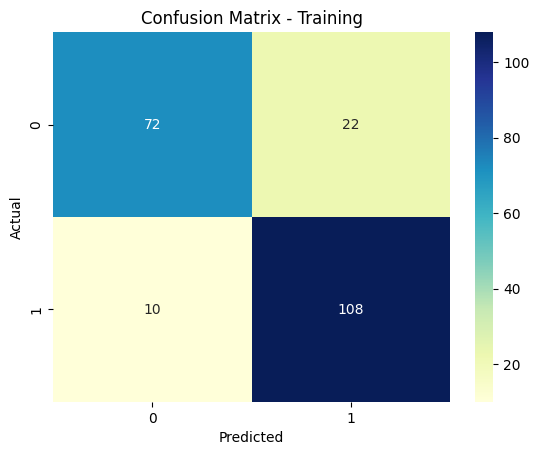

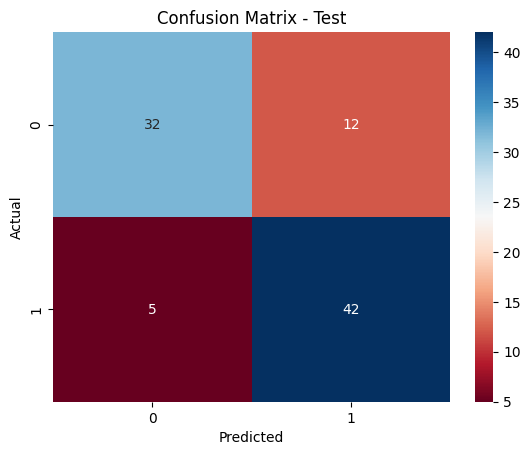

In [68]:
cm_train = confusion_matrix(Y_train, Y_pred_train)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Training")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 8. Confusion Matrix - Testing
cm_test = confusion_matrix(Y_test, Y_pred_test)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="RdBu")
plt.title("Confusion Matrix - Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


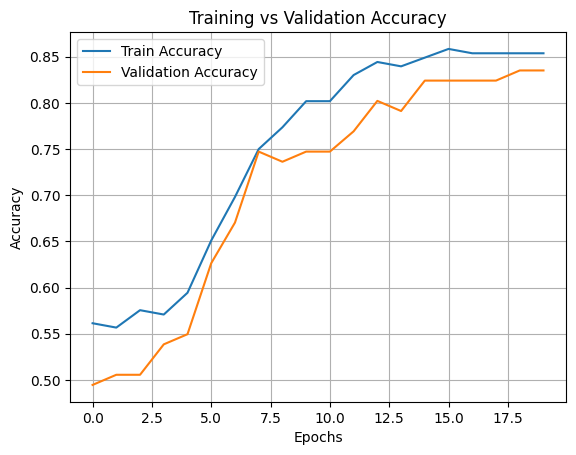

In [70]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

## Random Forest Model

- Design a Random Forest Model
- Train the model
- Find the Training Accuracy, Precision, Recall, F1 Score
- Find the Test Accuracy, Precision, Recall, F1 Score
- Visualize Train and Test Confusion Metrics
- Visualize the Training and Test Performance Metrics
- Identify the most important features
- Train the model on top 5 features, does it perform better than the model trained with all the features?

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [44]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [45]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, Y_train)


RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions
Y_pred_train = rf_model.predict(X_train_scaled)
Y_pred_test = rf_model.predict(X_test_scaled)

# Training metrics
print("Training Accuracy:", accuracy_score(Y_train, Y_pred_train))
print("Training Precision:", precision_score(Y_train, Y_pred_train))
print("Training Recall:", recall_score(Y_train, Y_pred_train))
print("Training F1 Score:", f1_score(Y_train, Y_pred_train))

# Test metrics
print("\nTest Accuracy:", accuracy_score(Y_test, Y_pred_test))
print("Test Precision:", precision_score(Y_test, Y_pred_test))
print("Test Recall:", recall_score(Y_test, Y_pred_test))
print("Test F1 Score:", f1_score(Y_test, Y_pred_test))


Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1 Score: 1.0

Test Accuracy: 0.8351648351648352
Test Precision: 0.7962962962962963
Test Recall: 0.9148936170212766
Test F1 Score: 0.8514851485148515


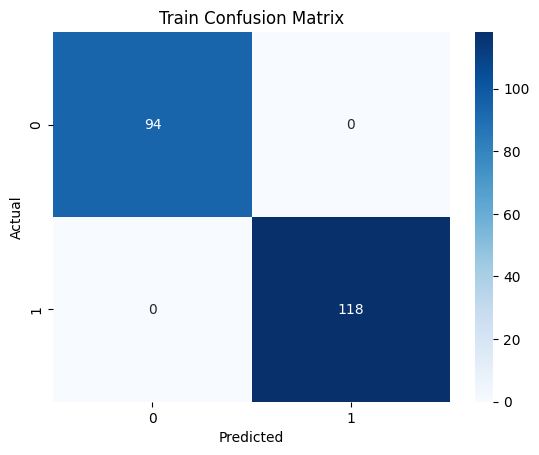

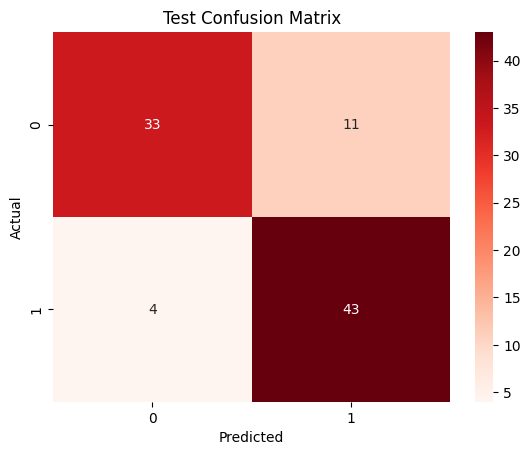

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Train Confusion Matrix
sns.heatmap(confusion_matrix(Y_train, Y_pred_train), annot=True, fmt='d', cmap='Blues')
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Test Confusion Matrix
sns.heatmap(confusion_matrix(Y_test, Y_pred_test), annot=True, fmt='d', cmap='Reds')
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Top 5 Important Features: ['thalach', 'cp', 'ca', 'oldpeak', 'thal']


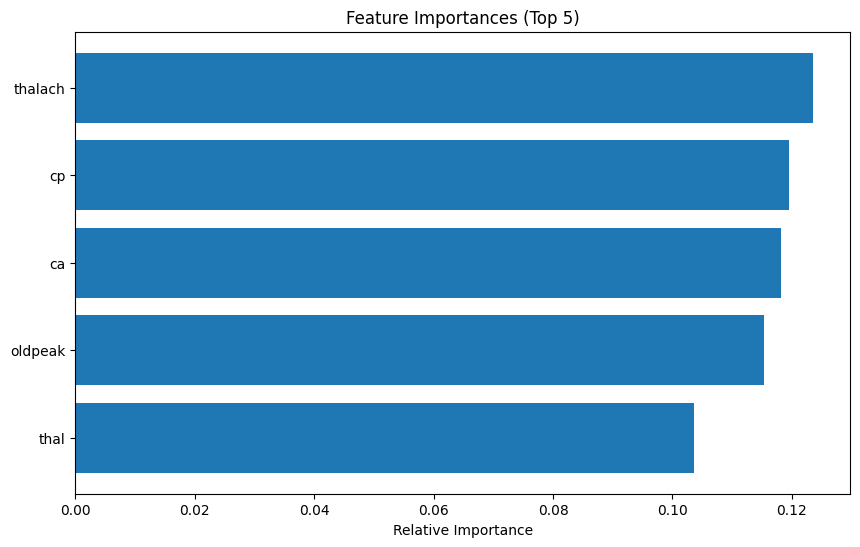

In [50]:
import numpy as np

# Feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Top 5 features
top_5_indices = indices[:5]
top_5_features = [X.columns[i] for i in top_5_indices]

print("Top 5 Important Features:", top_5_features)

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Top 5)")
plt.barh(range(5), importances[top_5_indices][::-1], align="center")
plt.yticks(range(5), [X.columns[i] for i in top_5_indices][::-1])
plt.xlabel("Relative Importance")
plt.show()


In [51]:
# Subset dataset
X_top5 = X[top_5_features]

X_train_top5, X_test_top5, Y_train, Y_test = train_test_split(X_top5, Y, test_size=0.3, random_state=0)
X_train_top5_scaled = scaler.fit_transform(X_train_top5)
X_test_top5_scaled = scaler.transform(X_test_top5)

rf_top5 = RandomForestClassifier(n_estimators=300, random_state=42)
rf_top5.fit(X_train_top5_scaled, Y_train)

Y_pred_top5 = rf_top5.predict(X_test_top5_scaled)
print("Accuracy with Top 5 Features:", accuracy_score(Y_test, Y_pred_top5))


Accuracy with Top 5 Features: 0.8131868131868132


## Model Comparison

- Compare the performance on Test set for each model on Accuracy, Precision and Recall
- Use Visualization Techniques
- Draw ROC Curves for each of the three model
- What we learn from ROC Curves?
- Add more cells as required.

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Helper function
def evaluate_model(name, y_true, y_pred, y_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    return {
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "FPR": fpr,
        "TPR": tpr,
        "AUC": roc_auc
    }

# Predictions
y_proba_logistic = logistic_model.predict_proba(X_test_scaled)[:, 1]
y_pred_logistic = logistic_model.predict(X_test_scaled)

y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
y_pred_rf = rf_model.predict(X_test_scaled)

y_proba_nn = nn_model.predict(X_test_scaled).ravel()
y_pred_nn = (y_proba_nn > 0.5).astype(int)

# Evaluate
results = [
    evaluate_model("Logistic Regression", Y_test, y_pred_logistic, y_proba_logistic),
    evaluate_model("Neural Network", Y_test, y_pred_nn, y_proba_nn),
    evaluate_model("Random Forest", Y_test, y_pred_rf, y_proba_rf)
]

df_results = pd.DataFrame(results)[["Model", "Accuracy", "Precision", "Recall"]]
print(df_results)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.835165   0.785714  0.936170
1       Neural Network  0.802198   0.773585  0.872340
2        Random Forest  0.835165   0.796296  0.914894


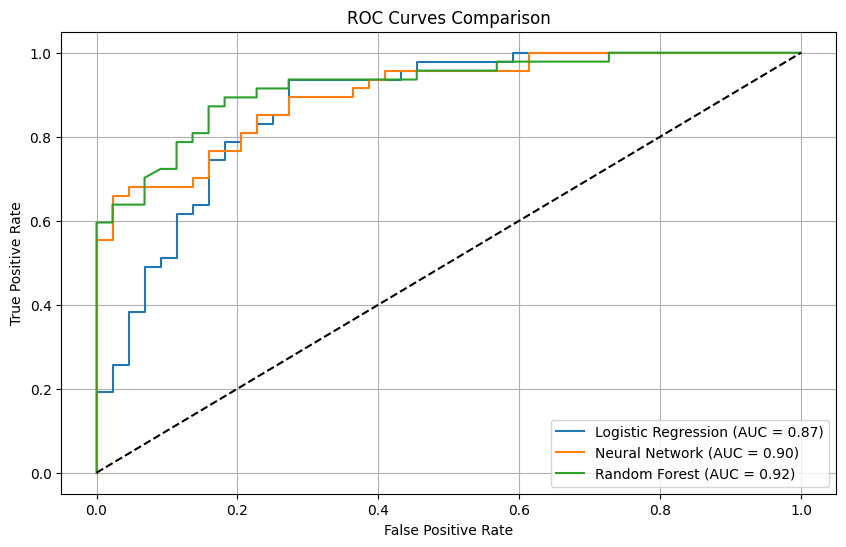

In [73]:
#ROC CURVE
# Plot ROC curves
plt.figure(figsize=(10, 6))
for res in results:
    plt.plot(res["FPR"], res["TPR"], label=f"{res['Model']} (AUC = {res['AUC']:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
#random forest perform the best It has the highest AUC = 0.92 and logistic regression performed the worst with the least ROC curve

In [76]:
import time

start = time.time()
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, Y_train)
end = time.time()
time_logistic = end - start


In [77]:
start = time.time()
nn_model = Sequential([
    Dense(15, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train_scaled, Y_train, epochs=100, batch_size=32, verbose=0)
end = time.time()
time_nn = end - start


C:\Users\A Ebrahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [78]:
start = time.time()
rf_model = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, Y_train)
end = time.time()
time_rf = end - start


In [79]:
import time
import matplotlib.pyplot as plt

start = time.time()
model.fit(X_train, Y_train)
end = time.time()
training_time = end - start


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0096


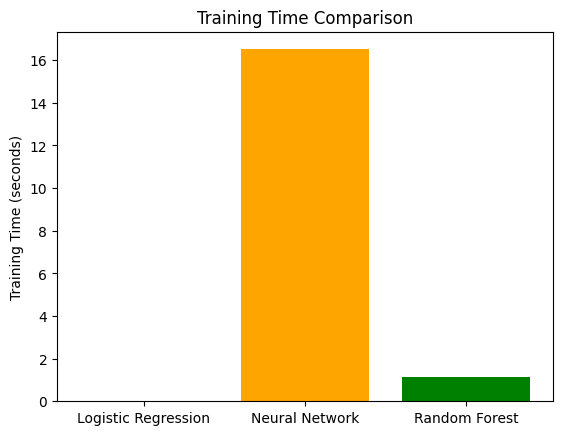

In [80]:
models = ['Logistic Regression', 'Neural Network', 'Random Forest']
times = [time_logistic, time_nn, time_rf]

plt.bar(models, times, color=['skyblue', 'orange', 'green'])
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison')
plt.show()


In [ ]:
#COMPLEX MODEL ALWAYS BETTER?
#NO, Complex models overfit easily (especially on small data).Simple models are easier to interpret and faster to train.It worled okay for this dataset but a model should be chosen based on the data size, feature type, time and resources